In [1]:
pip install requests

In [2]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


Objective -
1) I will send the request to amazon website for extracting code 
2) with the help of bs4 package i will convert the extracted code into html format and parse it to extract specific data from it
3) i will convert the extracted data into dataframe for performing analysis and manipulation on the dataset 
4) then i will write the dataframe into csv file format 

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [55]:
url = "https://www.amazon.in/s?k=playstation+5&crid=30ME2393P3E16&sprefix=playsta%2Caps%2C235&ref=nb_sb_ss_ts-doa-p_1_7"

In [56]:
Headers = ({"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36" , "Accept-Language" : "en-US, en;q=0.5"})

Making Request to url

In [57]:
webpage = requests.get(url,headers = Headers)

In [58]:
webpage

<Response [200]>

In [59]:
webpage.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- 

As it is in byte format i need to change it to html format

In [60]:
soup = BeautifulSoup(webpage.content,"html.parser")

soup has data in html format

In [61]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--

i want to extract all the link from soup and in html all links are written under anchor tag 

In [62]:
links = soup.find_all("a" , attrs = {"class" : "a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"})

In [63]:
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Sony-PS5-PlayStation-Console/dp/B0BRCP72X8/ref=sr_1_1?crid=30ME2393P3E16&amp;keywords=playstation+5&amp;qid=1689250906&amp;sprefix=playsta%2Caps%2C235&amp;sr=8-1" target="_blank"><span class="a-size-medium a-color-base a-text-normal">Sony PS5 PlayStation Console</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Sony-PS5-Digital-Standalone/dp/B0BSNHFVL4/ref=sr_1_2?crid=30ME2393P3E16&amp;keywords=playstation+5&amp;qid=1689250906&amp;sprefix=playsta%2Caps%2C235&amp;sr=8-2" target="_blank"><span class="a-size-medium a-color-base a-text-normal">Sony PS5 Digital Standalone</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Sony-PlayStation-Console-Ragnarok-Standard/dp/B0BXRSNB6Z/ref=sr_1_3?crid=30ME2393P3E16&amp;keywords=playstation+5&amp;qid=1689250906&amp;sprefix=playsta%

In [64]:
link = links[0].get("href")

In [65]:
product_list = "https://amazon.in" + link

In [66]:
product_list

'https://amazon.in/Sony-PS5-PlayStation-Console/dp/B0BRCP72X8/ref=sr_1_1?crid=30ME2393P3E16&keywords=playstation+5&qid=1689250906&sprefix=playsta%2Caps%2C235&sr=8-1'

Now i got first link and now i will make request to that link and extract the needed data

In [67]:
new_webpage = requests.get(product_list,headers = Headers)

In [68]:
new_soup = BeautifulSoup(new_webpage.content,"html.parser")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--
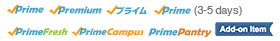
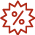

In [69]:
new_soup

Now i will extract the title from the new soup 

In [70]:
new_soup.find("span" , attrs = {"id" : "productTitle"}).text.strip()

'Sony PS5 PlayStation Console'

Now i will extract the price from the new soup 

In [72]:
new_soup.find("span" , attrs = {"class" : "a-price-whole"}).text.strip()

'54,300.'

Now i will extracting the rating from the new soup

In [73]:
new_soup.find("span" , attrs = {"class" : "a-icon-alt"}).text.strip()

'4.4 out of 5 stars'

In [78]:
new_soup.find("div",attrs = {"id" : "availability"}).text.strip()

'In stock'

Now i will write my final code by performing an iteration on all the links from the soup and extracting needful information from each link and then create a proper dataframe on it .

In [87]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [97]:
def get_title(soup):
    try :
        title = soup.find("span" , attrs = {"id" : "productTitle"}).text.strip()
    except AttributeError:
        title = ""
    return title

def get_price(soup):
    try :
        price = soup.find("span" , attrs = {"class" : "a-price-whole"}).text.strip()
    except AttributeError:
        price = ""
    return price

def get_availability(soup):
    try :
        availability = soup.find("div",attrs = {"id" : "availability"}).text.strip()
    except AttributeError:
        availability = "Not Available"
    return availability

def get_rating(soup):
    try :
        rating = soup.find("span" , attrs = {"class" : "a-icon-alt"}).text.strip()
    except AttributeError:
        rating = ""
    return rating


In [101]:
if __name__ == "__main__":
    
    url = "https://www.amazon.in/s?k=playstation+5&crid=30ME2393P3E16&sprefix=playsta%2Caps%2C235&ref=nb_sb_ss_ts-doa-p_1_7"
    
    Headers = ({"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36" , "Accept-Language" : "en-US, en;q=0.5"})
    
    webpage = requests.get(url,headers = Headers)
    
    soup = BeautifulSoup(webpage.content,"html.parser")
    
    links = soup.find_all("a" , attrs = {"class" : "a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"})
    
    data = {"title" : [] , "rating" : [] , "price" : [] , "availability" : []}
    
    for link in links:
        
        full_link = "https://www.amazon.in" + link.get("href")
        
        new_web_page = requests.get(full_link,headers = Headers)
        
        new_soup = BeautifulSoup(new_web_page.content,"html.parser")
        
        data["title"].append(get_title(new_soup))
        data["rating"].append(get_rating(new_soup))
        data["price"].append(get_price(new_soup))
        data["availability"].append(get_availability(new_soup))
    
    df = pd.DataFrame(data)
    df.replace(to_replace = "", value = np.nan , inplace = True)
    df.dropna(subset = ["title"],axis = 0,inplace = True)
    df.to_csv("Amazon_scrape_data.csv",header = True , index = False)
        